Referência: https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf

Vamos interpretar os gráficos. 

ACF: A função ACF faz a correlação de dois eventos com uma determinada diferença de tempo. Digamos que nossa janela é de 3 dias, então o ACF vai medir a correlação indireta dos eventos de 3 dias atrás com os eventos de hoje. Por que indireta? A função ACF vai fazer a correlação entre o dia T-3 com T-2, depois com T-2 T-1 e finalmente T-1 T-i, ou seja, a função calcula indiretamente passando por todos os antecessores do evento que estão no range desejado para fazer eu agregado de correlações. 

PACF: A função PACF é mais direta e mede diretamente a correlação entre o dia T-3 com T-i, sem agregar as correlações dos dias antecessores ao evento desejado. 

C:\Users\kaueo\AppData\Local\Temp\ipykernel_10556\602811067.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", period="max")
[*********************100%***********************]  1 of 1 completed


<Figure size 1200x600 with 0 Axes>

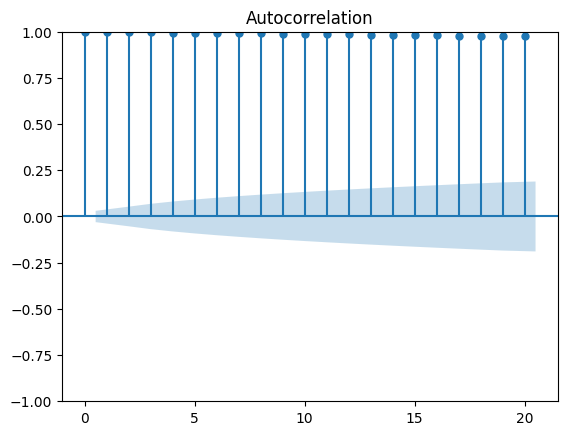

In [5]:
import yfinance as yf
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

btc = yf.download("BTC-USD", period="max")

plt.figure(figsize=(12, 6))
plot_acf(btc['Close'], lags=20)
plt.show()

<Figure size 1200x600 with 0 Axes>

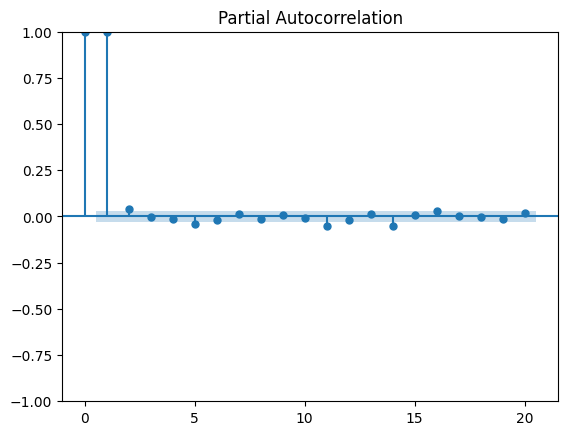

In [6]:
plt.figure(figsize=(12, 6))
plot_pacf(btc['Close'], lags=20)
plt.show()

Podemos observar a partir dos gráficos que valores imediatamente anteriores ao evento observado tem uma grande correlação entre si, ou seja, digamos que estamos observando o preço de fechamento do bitcoin hoje, esse preço foi influênciado pelo preço imediatamente anterior a ele. 

A partir dos gráficos e da referência deixada ao topo deste notebook, poderiámos suspeitar de que essa série se trata de uma série do tipo AR. Porém para essa modelagem funcionar corretamente precisa atender critérios como: 

* Média constante
* Variância constante
* Autocorrelação depende somente da distância entre os pontos

Como podemos observar no primeiro módulo dessa análise, a série temporal do BTC não respeita as duas primeiras regras. Por isso o modelo AR não poderia ser aplicado diretamente nesses dados.

O que nos leva a duas opções:

* Transformar os dados atráves de métodos matemáticos como diferenciação e logs e trabalhar com esses dados
* Usar um modelo que incorpora essa diferenciação e sabe trabalhar com isso

Para essa análise vamos seguir com a segunda opção. Vamos usar o modelo ARIMA. 

AR (AutoRegressivo): usa eventos passados para prever eventos atuais.
I (integrado): É o número de diferenciações aplicadas para transformar em uma série estacionária.
MA (Média Móvel): Usa os erros do passado para melhorar as previsões.